In [26]:
from math import pi
from math import log
import matplotlib.pyplot as plt

# Расчет массы детектора

In [2]:
NORM = (4. / 3. ) * pi
RO_SCINT = 1.032 # g / cm3
RO_W = 19.3 # g / cm3
RO_H = 0.0000899 # g / cm3
RO_B = 2.34 # g / cm3

In [3]:
def scint_vol(R):
    res = 0.
    for r in range(1, R + 1):
        res += 2.7 * r**2 - 2.97 * r + 0.999
        
    return NORM * res

In [4]:
def w_vol(R):
    res = 0.
    for r in range(1, R + 1):
        res += 0.3 * r**2 - 0.03 * r + 0.001
    
    return NORM * res

In [5]:
Radius = 125 # cm

In [6]:
det_mass = RO_SCINT * scint_vol(Radius) + RO_W * w_vol(Radius)
print('detectors mass is', round(det_mass / 10**6, 2), 'tons')
print('scint mass is', round(RO_SCINT * scint_vol(Radius) / 10**6, 2), 'tons')
print('w mass is', round(RO_W * w_vol(Radius) / 10**6, 2), 'tons')

detectors mass is 23.55 tons
scint mass is 7.59 tons
w mass is 15.96 tons


In [7]:
RO_SCINT = 1.1006 # g / cm3
RO_W = 19.25 # g / cm3

In [8]:
det_mass = RO_SCINT * scint_vol(Radius) + RO_W * w_vol(Radius)
print('detectors mass is', round(det_mass / 10**6, 2), 'tons')
print('scint mass is', round(RO_SCINT * scint_vol(Radius) / 10**6, 2), 'tons')
print('w mass is', round(RO_W * w_vol(Radius) / 10**6, 2), 'tons')

detectors mass is 24.01 tons
scint mass is 8.09 tons
w mass is 15.92 tons


# Исследование радиационной длины детектора

Радиационная длина это растояние, которое проходит частица в веществе и ее энергия при этом уменьшается в е раз.

In [9]:
def X0(A, Z, ro):
    x0 = 716.4 * A / (Z * (Z + 1) * log(287 / Z**0.5))
    print(round(x0, 2), 'g / cm2;', round(x0 / ro, 2), 'cm')

In [10]:
# W
X0(183.84, 74, RO_W)

6.77 g / cm2; 0.35 cm


In [ ]:
# C
X0(12.0096, 6, 2.24)

Для C табличные значения: 42.7 г/см3; 19.32 см

In [ ]:
# Al
X0(26.9815386, 13, 2.6989)

Для Al табличные значения: 24.01 г/см3; 8.897 см

In [ ]:
# H
X0(1.00784, 1, RO_H)

Для H табличные значения: 63.04 г / см2; 890.4 см

**Вывод**

С некоторой точность, формула работает верно!

# Зависимость радиуса и массы детектора

In [13]:
def mass(R):
    ro_scint = 1.032 # g / cm3
    ro_wolfram = 19.25 # g / cm3
    NORM = (4. / 3.) * pi

    # Внутренний слой сцинтилятор
    m_scint = 0.
    m_wolfram = 0.
    r_scint = 0.
    r_wolfram = 0.
    for ri in range(R):
        r_scint = ri + 0.9
        r_wolfram = ri 
        m_scint +=  (r_scint**3 - r_wolfram**3) * ro_scint 
        m_wolfram += ((r_wolfram + 1.)**3 - r_scint**3) * ro_wolfram 

    m_scint *= NORM
    m_wolfram *= NORM
    
    return round((m_scint + m_wolfram) / 10**6, 2)


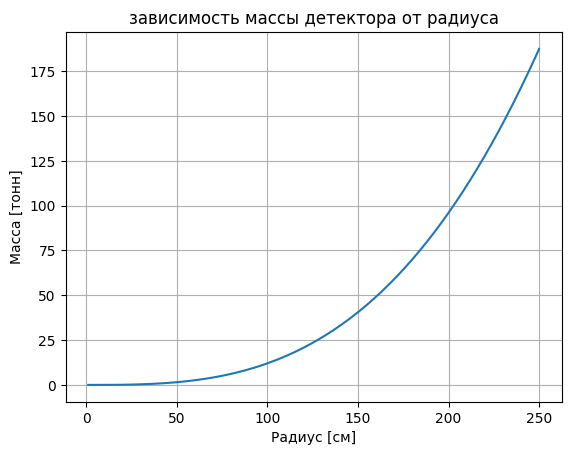

In [49]:
Rmax = 250 # cm
R_list = [0.] * Rmax
M_list = [0.] * Rmax


Ri = 0
for i in range(Rmax):
    Ri = i + 1
    R_list[i] = Ri
    M_list[i] = mass(Ri)

fig, ax = plt.subplots()
plt.plot(R_list, M_list)
ax.set_title('зависимость массы детектора от радиуса')
ax.set_xlabel('Радиус [см]')
plt.grid(True)
ax.set_ylabel('Масса [тонн]');

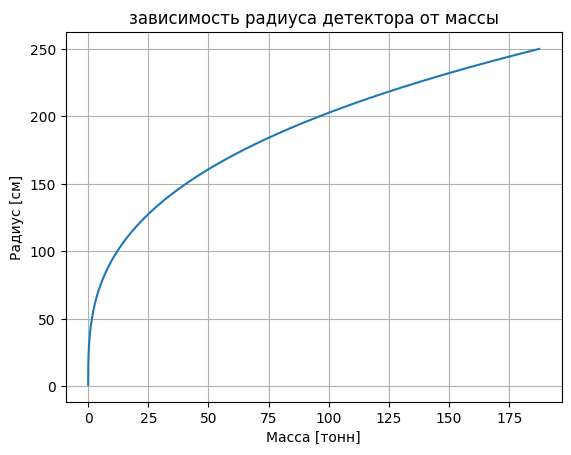

In [56]:
fig, ax = plt.subplots()
plt.plot(M_list, R_list)
ax.set_title('зависимость радиуса детектора от массы')
ax.set_xlabel('Масса [тонн]')
plt.grid(True)
ax.set_ylabel('Радиус [см]');

In [60]:
print(mass(93), '-', mass(94))

9.7 - 10.02


In [68]:
print(mass(135), '-', mass(136))

29.6 - 30.26


In [73]:
print(mass(179), '-', mass(180))

68.89 - 70.05
